## Задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Признаки:
1. satisfaction_level — Уровень удовлетворенности работой
2. Last_evaluation — Время с момента последней оценки в годах
3. number_projects — Количество проектов, выполненных за время работы
4. average_monthly_hours — Среднее количество часов на рабочем месте в месяц
5. time_spend_company — Стаж работы в компании в годах
6. work_accident — Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left — уволился ли сотрудник
8. promotion_last_5years — повышался ли сотрудник за последние пять лет
9. department — отдел в котором работает сотрудник
10. salary — относительный уровень зарплаты

Требуется выполнить следующее задание:

1. Загрузите файл HR.csv в pandas dataframe
2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.
4. Рассчитайте сколько сотрудников работает в каждом департаменте.
5. Показать распределение сотрудников по зарплатам.
6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
  * Доля сотрудников с повышением за последние 5 лет
  * Средняя степень удовлетворенности
  * Среднее количество проектов
9. Разделить данные на тестовую и обучающую выборкиПостроить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке
10. Загрузить jupyter notebook с решение на github и прислать ссылку

## Решение:

1. Загрузите файл HR.csv в pandas dataframe

In [2]:
import pandas as pd
hr = pd.read_csv('HR.csv')

In [7]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [9]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [18]:
hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
hr.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

3. Рассчитать и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [30]:
corr = hr.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

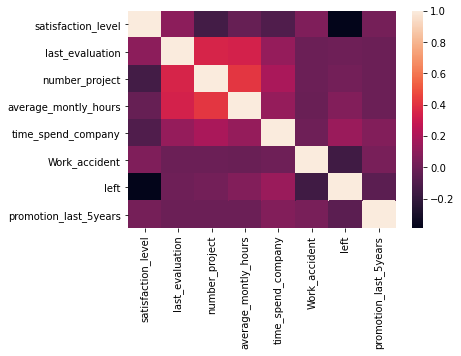

In [49]:
import seaborn as sns
sns.heatmap(corr)

<AxesSubplot:>

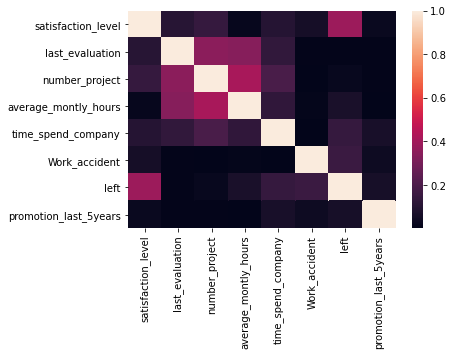

In [50]:
sns.heatmap(corr.abs())

In [46]:
corr.abs().min()

satisfaction_level       0.020048
last_evaluation          0.006567
number_project           0.004741
average_montly_hours     0.003544
time_spend_company       0.002120
Work_accident            0.002120
left                     0.006567
promotion_last_5years    0.003544
dtype: float64

In [47]:
corr.abs().min().min()

0.00212041809671425

In [45]:
corr.replace(1.0, 0.0).abs().max()

satisfaction_level       0.388375
last_evaluation          0.349333
number_project           0.417211
average_montly_hours     0.417211
time_spend_company       0.196786
Work_accident            0.154622
left                     0.388375
promotion_last_5years    0.067433
dtype: float64

In [48]:
corr.replace(1.0, 0.0).abs().max().max()

0.4172106344017606

**Вывод**:
* Самый высокий уровень корреляции (0.417211) у переменных number_project и average_monthly_hours,
* Самый низкий уровень корреляции (0.002120) у переменных time_spend_company и Work_accident.

In [52]:
corr = hr.corr(method='kendall')
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005,0.046298,-0.300675,0.018332
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842,-0.004749,-0.002010,-0.005903
number_project,0.022077,0.266267,1.000000,0.306987,0.195025,0.002096,-0.017601,-0.002666
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466,-0.004966,0.038045,-0.002417
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000,-0.024839,0.244851,0.032059
Work_accident,0.046298,-0.004749,0.002096,-0.004966,-0.024839,1.000000,-0.154622,0.039245
left,-0.300675,-0.002010,-0.017601,0.038045,0.244851,-0.154622,1.000000,-0.061788
promotion_last_5years,0.018332,-0.005903,-0.002666,-0.002417,0.032059,0.039245,-0.061788,1.000000


<AxesSubplot:>

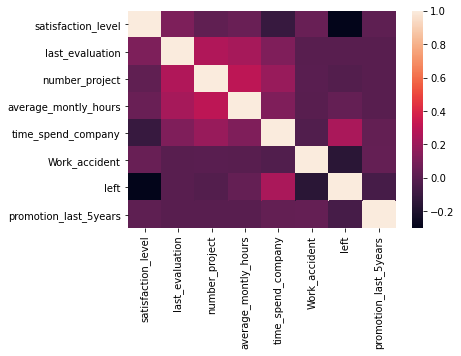

In [260]:
sns.heatmap(corr)

<AxesSubplot:>

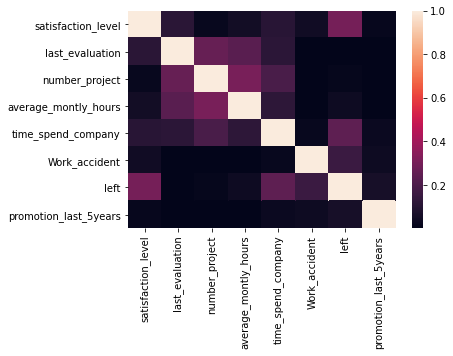

In [261]:
sns.heatmap(corr.abs())

In [53]:
corr.abs().min()

satisfaction_level       0.018332
last_evaluation          0.002010
number_project           0.002096
average_montly_hours     0.002417
time_spend_company       0.024839
Work_accident            0.002096
left                     0.002010
promotion_last_5years    0.002417
dtype: float64

In [54]:
corr.abs().min().min()

0.00201000692891097

In [55]:
corr.replace(1.0, 0.0).abs().max().max()

0.3069867487951578

In [56]:
corr.replace(1.0, 0.0).abs().max()

satisfaction_level       0.300675
last_evaluation          0.266267
number_project           0.306987
average_montly_hours     0.306987
time_spend_company       0.244851
Work_accident            0.154622
left                     0.300675
promotion_last_5years    0.061788
dtype: float64

**Вывод**:

Если считать коэффициенты по Кенделлу, ситуация в целом схожа, но все же немного меняется:
* Самый высокий уровень корреляции (0.306987) у тех же переменных number_project и average_monthly_hours,
* Самый низкий уровень корреляции (0.002010) у переменных last_evaluation и left.

Pairplot показывает, что характер взамосвязей данных (если они существуют) не похож на линейный. Поэтому логичнее доверять данным, полученным при расчете по Кенделлу.

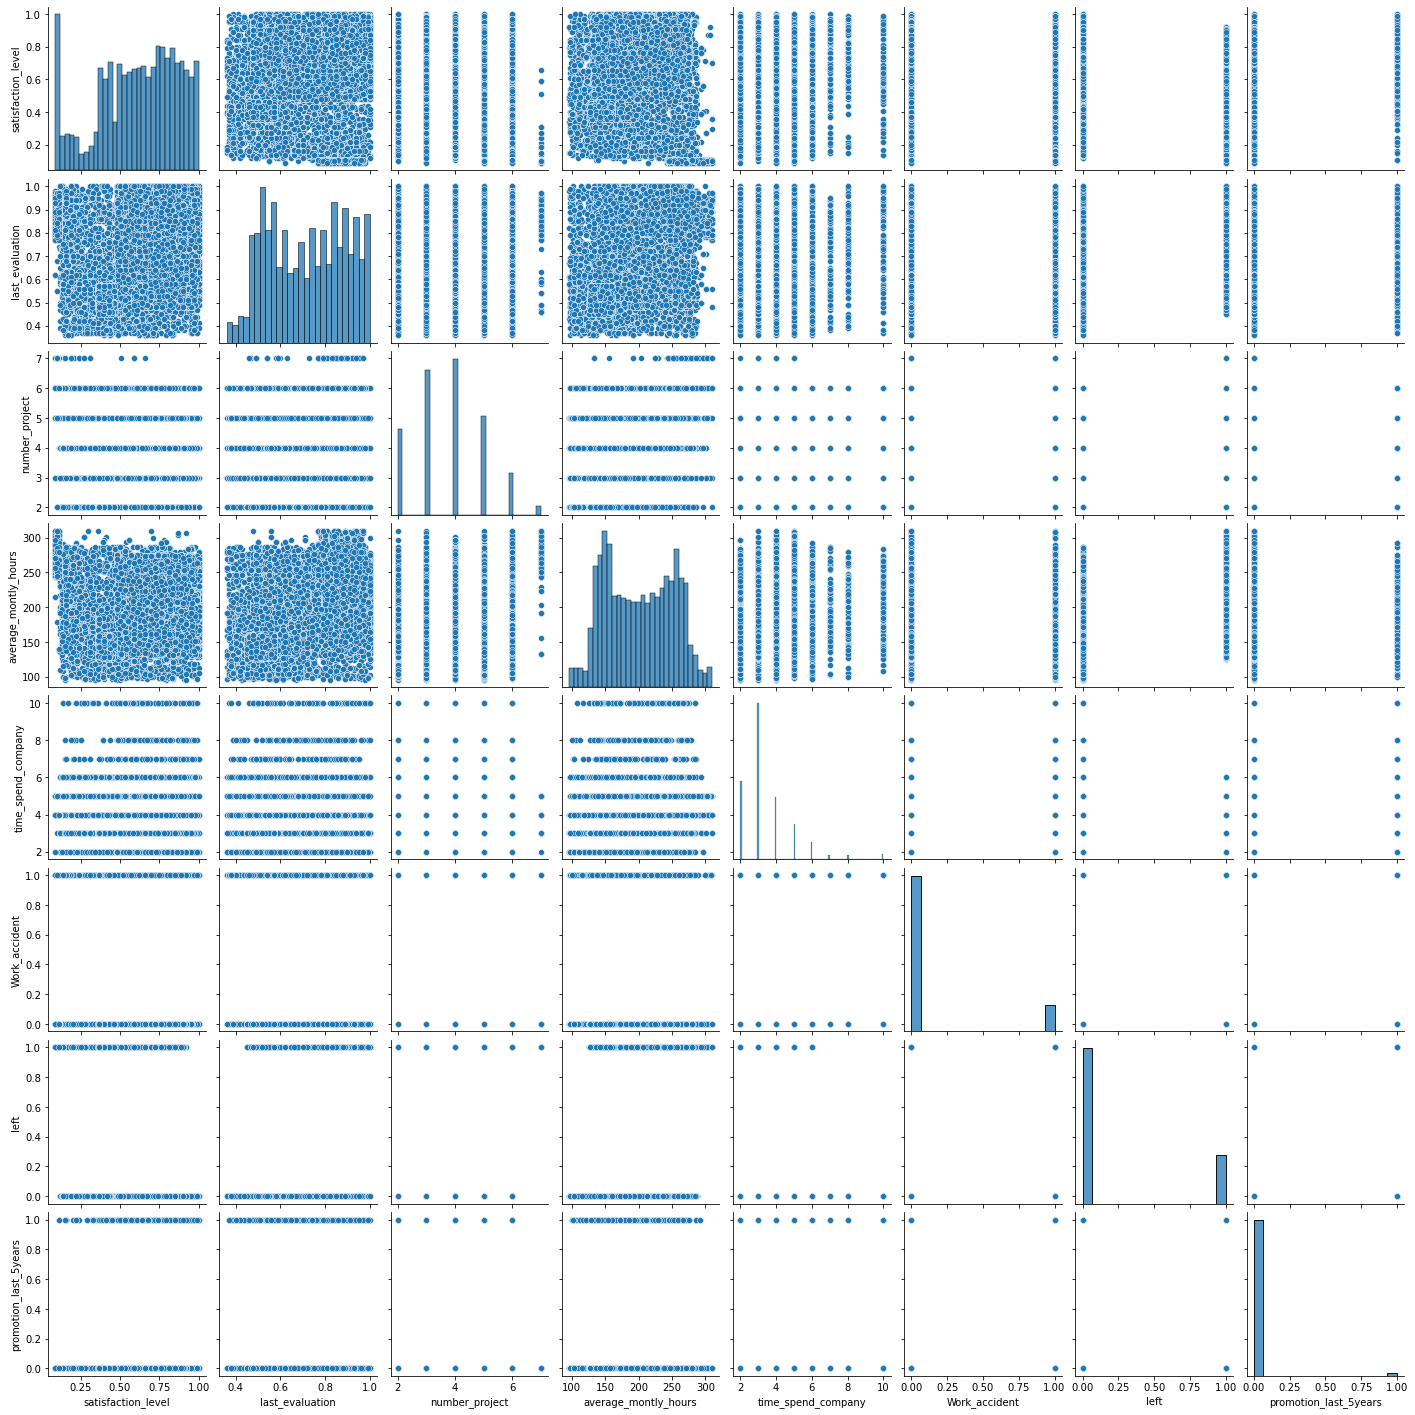

In [259]:
sns.pairplot(hr)

4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [3]:
hr[hr.left != 1].department.value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

5. Показать распределение сотрудников по зарплатам.

Считаем только действующих сотрудников

<AxesSubplot:>

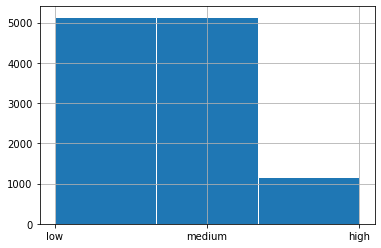

In [72]:
hr[hr.left != 1].salary.hist(bins=3, ec='white')

In [73]:
hr[hr.left != 1].salary.value_counts()

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [78]:
hr[hr.left != 1].groupby('department').salary.value_counts()

department   salary
IT           medium     438
             low        437
             high        79
RandD        medium     310
             low        309
             high        47
accounting   low        259
             medium     235
             high        69
hr           low        243
             medium     242
             high        39
management   high       224
             medium     194
             low        121
marketing    medium     308
             low        276
             high        71
product_mng  low        346
             medium     296
             high        62
sales        medium    1469
             low       1402
             high       255
support      medium     784
             low        757
             high       133
technical    low        994
             medium     853
             high       176
Name: salary, dtype: int64

array([[<AxesSubplot:title={'center':'IT'}>,
        <AxesSubplot:title={'center':'RandD'}>,
        <AxesSubplot:title={'center':'accounting'}>],
       [<AxesSubplot:title={'center':'hr'}>,
        <AxesSubplot:title={'center':'management'}>,
        <AxesSubplot:title={'center':'marketing'}>],
       [<AxesSubplot:title={'center':'product_mng'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'support'}>],
       [<AxesSubplot:title={'center':'technical'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

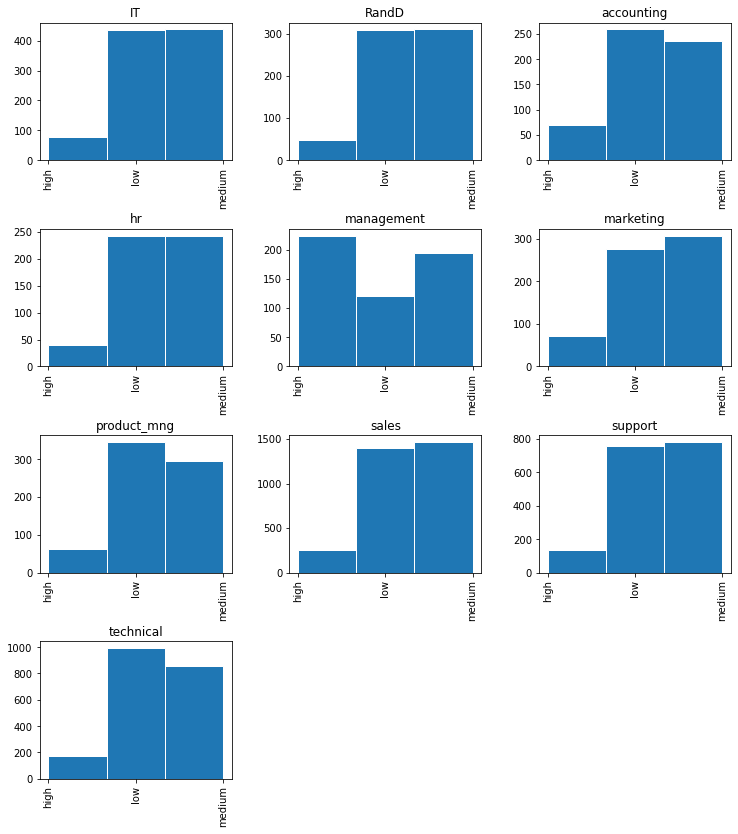

In [107]:
# order = ['low', 'medium', 'high']
hr[hr.left != 1].salary.sort_values().hist(by=hr.department, bins=3, ec='white', figsize =(12,14) )

7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

<AxesSubplot:>

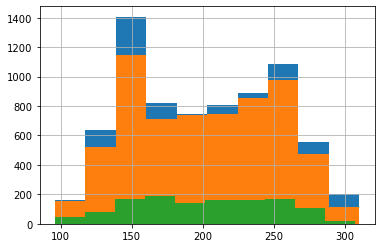

In [114]:
hr[hr.salary == 'low'].average_montly_hours.hist()
hr[hr.salary == 'medium'].average_montly_hours.hist()
hr[hr.salary == 'high'].average_montly_hours.hist()

In [115]:
import scipy.stats as stats

t, p  = stats.ttest_ind(hr[hr.salary == 'low'].average_montly_hours,hr[hr.salary == 'high'].average_montly_hours)


print('t=%.3f, p=%.3f' % (t, p))

t=0.729, p=0.466


**Вывод**: Очень высокий уровень p-value (больше 45%) не позволяет отвегнуть нулевую гипотезу. Мы не можем считать, что сотрудники с высокой зарплатой проводят на работе больше времени, чем сотрудники с маленькой.

Гистограмма также показывает, что распределения рабочего времени для всех трех уровней зарплат очень схожи.

Гипотеза не подтвердилась.

8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

**Действующие сотрудники**:

In [256]:
hr[hr.left != 1].promotion_last_5years.value_counts(normalize=True)

0    0.973749
1    0.026251
Name: promotion_last_5years, dtype: float64

Доля сотрудников с повышением за последние 5 лет — 2,63%

In [252]:
hr[hr.left != 1].satisfaction_level.mean()

0.666809590479516

In [253]:
hr[hr.left != 1].number_project.mean()

3.786664333216661

**Уволившиеся сотрудники**:

In [164]:
hr[hr.left == 1].promotion_last_5years.value_counts(normalize=True)

0    0.994679
1    0.005321
Name: promotion_last_5years, dtype: float64

Доля сотрудников с повышением за последние 5 лет — 0,53%

In [254]:
hr[hr.left == 1].satisfaction_level.mean()

0.44009801176140917

In [257]:
hr[hr.left == 1].number_project.mean()

3.8555026603192384

9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке

In [247]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [248]:
X_train, X_test, y_train, y_test = train_test_split(hr.drop(['department', 'salary', 'left'], axis = 1), hr.left.tolist(), test_size=0.25)

In [249]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
predict = lda.predict(X_test)

In [250]:
result = pd.DataFrame([y_test, predict]).T

In [242]:
result.head(10)

,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0


In [240]:
accuracy_score(result.iloc[:, 0], result.iloc[:, 1])

0.7525333333333334

Точность нашей модели — 75%. 